<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abrindo-os-arquivos-e-limpando-os" data-toc-modified-id="Abrindo-os-arquivos-e-limpando-os-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abrindo os arquivos e limpando-os</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Determinação-da-CMC-e-$\Delta$H-e-esquema-mostrando-isso" data-toc-modified-id="Determinação-da-CMC-e-$\Delta$H-e-esquema-mostrando-isso-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Determinação da CMC e $\Delta$H e esquema mostrando isso</a></span><ul class="toc-item"><li><span><a href="#Colocando-números-nos-pontos" data-toc-modified-id="Colocando-números-nos-pontos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Colocando números nos pontos</a></span></li></ul></li></ul></div>

In [77]:
import pandas as pd
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

import matplotlib.pyplot as plt
import numpy as np
import io

from lmfit import minimize, Parameters, report_fit

# Abrindo os arquivos e limpando-os

In [2]:
raw_string = open('./dados experimentais/ITC_TTAB raw 42.itc', 'r').read().split('\n')
new_raw_string = []
for i, line in enumerate(raw_string):
    if i < 75:
        continue
    if line.startswith('@'):
        continue
    new_raw_string.append(line)
    
#print(raw_string[:15],'\n\n\n', new_raw_string[:15])

In [3]:
raw_string_file = io.StringIO('\n'.join(new_raw_string))

In [4]:
raw_colnames = ['t', 'q', 'T', 'incerto', 'T2', 'un1', 'un2', 'un3', 'un4']
#raw = pd.read_csv(r'./dados experimentais/ITC_TTAB raw 42.itc', sep=',', decimal='.', 
#                  skiprows=75, names=raw_colnames)
raw = pd.read_csv(raw_string_file, names=raw_colnames)
#raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 9 columns):
t          5940 non-null float64
q          5940 non-null float64
T          5940 non-null float64
incerto    5940 non-null float64
T2         5940 non-null float64
un1        5940 non-null float64
un2        5940 non-null float64
un3        5940 non-null float64
un4        5940 non-null float64
dtypes: float64(9)
memory usage: 417.7 KB


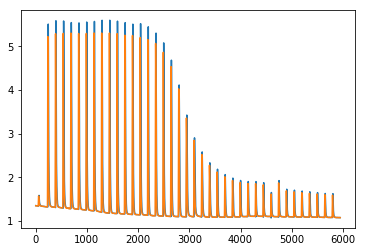

In [15]:
%matplotlib inline
plt.plot('t', 'q', data=raw)
#plt.plot('t', 'un1', data=raw)
#plt.plot('t', 'un2', data=raw)
plt.plot('t', 'un3', data=raw)
#plt.plot('t', 'un4', data=raw)
#plt.savefig('./teste.png', dpi=150)

In [19]:
inj_table_raw = open('./dados experimentais/ITC_TTAB tabela inj.csv', encoding='utf8').read()
inj_table_raw = inj_table_raw.replace('","', ';')
inj_table_raw = inj_table_raw.replace(',"', ';')
inj_table_raw = inj_table_raw.replace('"\n', '\n')
inj_table_raw = inj_table_raw.replace(',','.')
inj_table_raw = inj_table_raw.replace('".0',';0')

print(inj_table_raw)


﻿;ΔQ (μJ);Vol. (μL);Xt (mM);Mt (mM);XMT;∆H (J/mol);Fit (J/mol);Residual (J/mol);
1;13.92918;0.300;0.00000e0;1.00000;6.05858e-2;1095.06158;5074.77056;-3979.70898
2;210.88109;1.00;6.04994e-2;0.99857;0.26318;4973.11337;5073.84582;-100.73245
3;211.43238;1.00;0.26156;0.99383;0.46674;4986.11414;5072.19103;-86.07689
4;211.75861;1.00;0.46166;0.98911;0.67126;4993.80745;5070.17578;-76.36833
5;211.09146;1.00;0.66080;0.98441;0.87674;4978.07436;5067.73576;-89.66139
6;209.74992;1.00;0.85898;0.97974;1.08318;4946.43744;5064.78572;-118.34828
7;210.67276;1.00;1.05619;0.97509;1.29058;4968.20033;5061.21085;-93.01052
8;211.26975;1.00;1.25245;0.97045;1.49894;4982.27889;5056.85359;-74.57471
9;211.56039;1.00;1.44775;0.96584;1.70827;4989.13291;5051.49315;-62.36024
10;212.96905;1.00;1.64208;0.96126;1.91855;5022.35282;5044.81263;-22.45980
11;212.66456;1.00;1.83546;0.95669;2.12979;5015.17200;5036.34468;-21.17267
12;210.95233;1.00;2.02787;0.95214;2.34200;4974.79330;5025.37809;-50.58479
13;211.61677;1.00;2.21932;0.

In [38]:
raw_inj_file = io.StringIO(inj_table_raw)
raw_inj = pd.read_csv(raw_inj_file, sep=';')
raw_inj

,Unnamed: 0,ΔQ (μJ),Vol. (μL),Xt (mM),Mt (mM),XMT,∆H (J/mol),Fit (J/mol),Residual (J/mol),Unnamed: 9
0,1,13.92918,0.3,0.000000,1.00000,0.060586,1095.06158,5074.77056,-3979.70898,NaN
1,2,210.88109,1.0,0.060499,0.99857,0.263180,4973.11337,5073.84582,-100.73245,NaN
2,3,211.43238,1.0,0.261560,0.99383,0.466740,4986.11414,5072.19103,-86.07689,NaN
3,4,211.75861,1.0,0.461660,0.98911,0.671260,4993.80745,5070.17578,-76.36833,NaN
4,5,211.09146,1.0,0.660800,0.98441,0.876740,4978.07436,5067.73576,-89.66139,NaN
5,6,209.74992,1.0,0.858980,0.97974,1.083180,4946.43744,5064.78572,-118.34828,NaN
6,7,210.67276,1.0,1.056190,0.97509,1.290580,4968.20033,5061.21085,-93.01052,NaN
7,8,211.26975,1.0,1.252450,0.97045,1.498940,4982.27889,5056.85359,-74.57471,NaN
8,9,211.56039,1.0,1.447750,0.96584,1.708270,4989.13291,5051.49315,-62.36024,NaN
9,10,212.96905,1.0,1.642080,0.96126,1.918550,5022.35282,5044.81263,-22.45980,NaN


In [57]:
Xt = raw_inj.loc[1:, 'Xt (mM)'].reset_index(drop=True)
Mt = raw_inj.loc[1:39, 'Mt (mM)'].reset_index(drop=True)
DH = raw_inj.loc[0:38, '∆H (J/mol)'].reset_index(drop=True)
inj = pd.concat([Xt, Mt, DH], axis=1, names=['Xt', 'Mt', 'DH'])
inj.columns = ['Xt', 'Mt', 'DH']
inj

,Xt,Mt,DH
0,0.060499,0.99857,1095.06158
1,0.261560,0.99383,4973.11337
2,0.461660,0.98911,4986.11414
3,0.660800,0.98441,4993.80745
4,0.858980,0.97974,4978.07436
5,1.056190,0.97509,4946.43744
6,1.252450,0.97045,4968.20033
7,1.447750,0.96584,4982.27889
8,1.642080,0.96126,4989.13291
9,1.835460,0.95669,5022.35282


# Plots

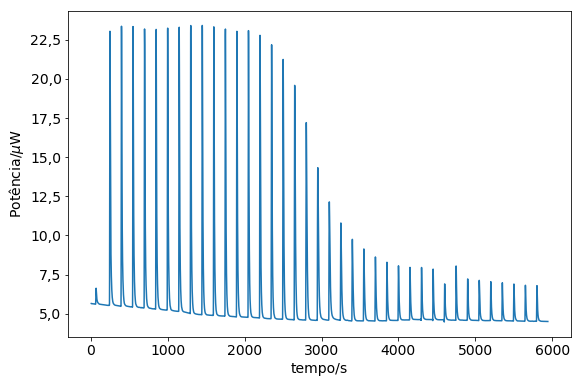

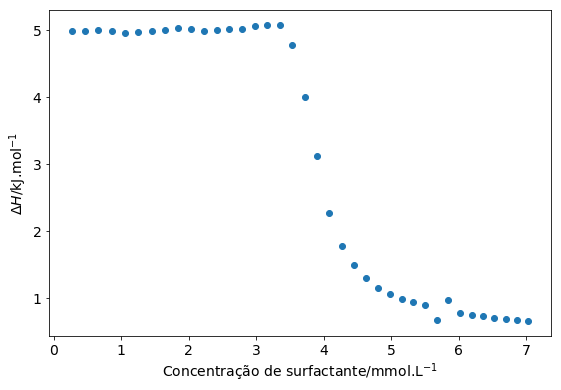

In [62]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
ax1.plot(raw['t'], raw['q']*4.18)
ax1.set(xlabel='tempo/s', ylabel='Potência/$\mu$W')

fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
ax2.plot(inj['Xt'][1:], inj['DH'][1:]/1000, marker='o', linewidth=0)
ax2.set(xlabel='Concentração de surfactante/mmol.L$^{-1}$', ylabel='$\Delta H$/kJ.mol$^{-1}$')

fig1.savefig(r'../itc/raw_itc_exemplo.pdf')
fig2.savefig(r'../itc/inj_itc_exemplo.pdf')

# Determinação da CMC e $\Delta$H e esquema mostrando isso

Retirados do notebook onde eu faço o ajuste das curvas

## Colocando números nos pontos

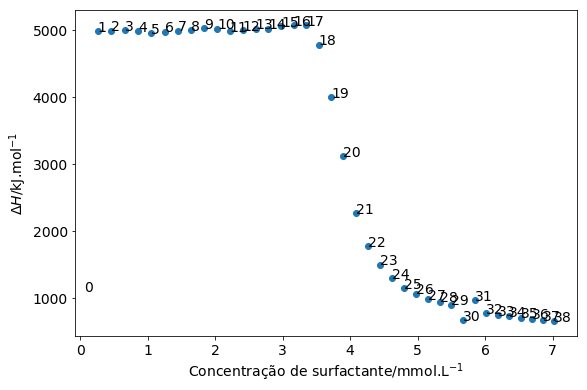

In [64]:
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
ax2.plot(inj['Xt'][1:], inj['DH'][1:], marker='o', linewidth=0)
ax2.set(xlabel='Concentração de surfactante/mmol.L$^{-1}$', ylabel='$\Delta H$/kJ.mol$^{-1}$')

for i, val in enumerate(inj['Xt']):
    ax2.text(inj['Xt'][i], inj['DH'][i], i)

Pontos para as regiões:

1: [1-17]

2: [29-38]

0 17 28 37 TTAB 42


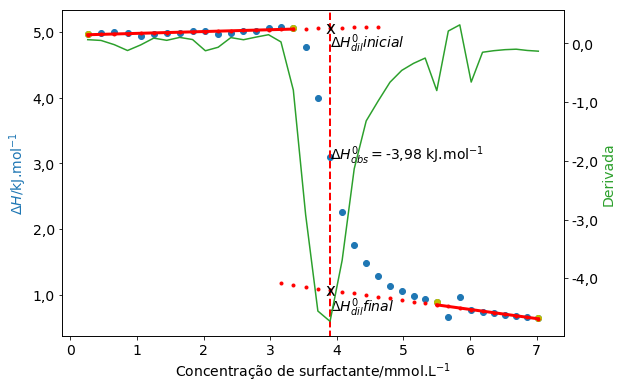

In [138]:
def deriv_o(x, y):
    temp = []
    for i, val in enumerate(x):
        if i == 0:
            d = (y[1] - y[0]) / (x[1] - x[0])
            #print(f'!{i}')
        elif i == len(x) - 1:
            d = (y[-1] - y[-2]) / (x[-1] - x[-2])
            #print(f'!!{i}')
        else:
            d = 1/2 * ( (y[i+1] - y[i]) / (x[i+1] - x[i]) + ( y[i] - y[i-1]) / (x[i] - x[i-1]) )
            #print(f'{i}')
        temp.append(d)
    return np.array(temp)

def get_cmc(x, deriv):
    min_point = ([i for i, val in enumerate(deriv) if val == min(deriv)])
    return x[min_point]

def residual_2_lin_man(params, x, dataset):
    (s1, i1, s2, i2, a1, a2, b1, b2) = (params['s1'].value, params['i1'].value, params['s2'].value, params['i2'].value, 
                                    int(params['a1'].value), int(params['a2'].value), 
                                    int(params['b1'].value), int(params['b2'].value))   


    resid1 = dataset[a1:a2] - (s1 * x[a1:a2] + i1)
    resid2 = dataset[b1:b2] - (s2 * x[b1:b2] + i2)
    
    return np.concatenate((resid1, resid2))

def plot_fit_man(x, y, s1, s2, i1, i2, a1, a2, b1, b2, cmc, deriv, dh1, dh2, DH, name=''):
    
    fig, ax1 = plt.subplots(figsize=(9,6))
    ax1.scatter(x, y, label=name)
    ax2 = ax1.twinx()
    
    ax1.plot(x[a1:a2], linear(x[a1:a2], s1, i1), c='red', linewidth=3)
    ax1.plot(x[0:24], linear(x, s1, i1)[0:24], 'r.')
    
    ax1.plot(x[b1:b2+1], linear(x[b1:b2+1], s2, i2), c='red', linewidth=3)
    ax1.plot(x[15:], linear(x, s2, i2)[15:], 'r.')
    
    ax2.plot(x, deriv, color='C2')
    
    # Criação dos pontos amarelos indicando os limites
    ax1.scatter(x[a1], y[a1], c='y')
    ax1.scatter(x[a2-1], y[a2-1], c='y')
    ax1.scatter(x[b1], y[b1], c='y')
    ax1.scatter(x[b2], y[b2], c='y')
    
    # Reta vertical na cmc
    ax1.axvline(x=cmc, ymin = min(deriv), ymax = max(y), linewidth=2, color='r', linestyle='dashed')
    
    # Mudando ticks dos Y para kJ
    ax1.set_yticklabels([str(i/1000).replace('.', ',') for i in ax1.get_yticks()])
    ax2.set_yticklabels([str(i/1000).replace('.', ',') for i in ax2.get_yticks()])
    
    ax1.set_ylabel('$\Delta H$/kJ.mol$^{-1}$', color='C0')
    ax1.set_xlabel('Concentração de surfactante/mmol.L$^{-1}$')
    ax2.set_ylabel('Derivada', color='C2')
    
    # Colocando textos, lembrando que tudo está em J
    ax1.text(cmc, dh1-300, r'$\Delta H^0_{dil} inicial$')
    ax1.text(cmc, dh2-325, r'$\Delta H^0_{dil} final$')
    #ax1.text(cmc, (dh1 + dh2)/2, r'$\Delta H^0_{obs} = $' + str(round(DH[0],0)/1000) + 'kJ.mol$^{-1}$')
    DHmic = str(round(DH[0]/1000, 3)).replace('.',',')[0:5]
    ax1.text(cmc, (dh1 + dh2)/2, rf'$\Delta H^0_{{obs}} = ${DHmic} kJ.mol$^{{-1}}$')
    ax1.text(cmc, dh1, 'x', ha='center', va='center', fontsize='large')
    ax1.text(cmc, dh2, 'x', ha='center', va='center', fontsize='large')


def linear(x, a, b):
    return a * x + b

def replot_cmc_DH(x, y, a1, a2, b1, b2, name):
    chisquares = []
    deriv = deriv_o(x, y)    
    cmc = get_cmc(x, deriv)
   
    params = Parameters()
    params.add('s1', 0., vary=True)
    params.add('i1', 8000., vary=True)
    params.add('s2', 0, vary=True)
    params.add('i2', 1., vary=True)
    params.add('a1', a1, vary=False)
    params.add('a2', a2, vary=False)
    params.add('b1', b1, vary=False)
    params.add('b2', b2, vary=False)

    fit = minimize(residual_2_lin_man, params, args=(x, y))

    s1 = fit.params['s1'].value
    s2 = fit.params['s2'].value
    i1 = fit.params['i1'].value
    i2 = fit.params['i2'].value

    dh1 = linear(cmc, s1, i1)
    dh2 = linear(cmc, s2, i2)
    DH = dh2 - dh1
    plot_fit_man(x, y, s1, s2, i1, i2, a1, a2, b1, b2, cmc, deriv, dh1, dh2, DH, name=name)
    return cmc, DH

name = 'TTAB 42'
a1 = 1-1
a2 = 18-1
b1 = 29-1
b2 = 38-1
print(a1, a2, b1, b2, name)
temp_x = np.array(inj['Xt'])
temp_y = np.array(inj['DH'])

cmc, DH = replot_cmc_DH(temp_x[1:], temp_y[1:], a1, a2, b1, b2, name)
plt.savefig('../itc/extracao_cmc_dh_exemplo.pdf')